In [1]:
# adjust the R limit
memory.limit(size= 81011630)

[1] 81011630

In [22]:
#necessary library
library(data.table) #fread
library(lubridate)
library(reshape2)
library(dplyr)
library(scales)
library(stringr)
#library(tidyverse)

Warning message:
"package 'data.table' was built under R version 3.6.3"

Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from 'package:base':

    date


Warning message:
"package 'reshape2' was built under R version 3.6.3"

Attaching package: 'reshape2'


The following objects are masked from 'package:data.table':

    dcast, melt


Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'scales' was built under R 

In [2]:
# Select the month you want to investigate
YEARLIST =("2019")
MONTHLIST = c("04")
COMPUTATION_FILEPATH = "../../data/tidy/"

In [4]:
interval_df = read.csv("../../data/tidy/trajectory-19-04-.csv")

In [1]:
dg_new = read.csv("../../data/raw/green-trajectory-19-04.csv")

In [61]:
head(dg_new)

,X,trxtime,trainid,vehicleid,routeid,counter,lineid,lat,lon,servicetypeid,...,year,time,trajid,interval_seconds,dist_meters,speed_mps,speed_kph,accel_mps2,cumdist_km,cumtime_hrs
,<int>,<fct>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,...,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2019-04-18 05:33:20,10001,3653,0,25599,4,42.33696,-71.25329,1,...,2019,2019-04-18 05:33:20,1,12,26.68781,2.22398449,8.0063442,0.060549294,0.05364089,0.008333333
2,2,2019-04-18 05:50:21,10001,3653,0,27350,4,42.33689,-71.25384,1,...,2019,2019-04-18 05:50:21,1,1021,46.45064,0.04549524,0.1637829,-0.002133682,0.10009153,0.291944444
3,3,2019-04-18 05:51:52,10001,3653,0,27585,4,42.33692,-71.25150,1,...,2019,2019-04-18 05:51:52,1,91,192.73857,2.11800624,7.6248225,0.022774846,0.29283009,0.317222222
4,4,2019-04-18 05:52:04,10001,3653,0,27624,4,42.33666,-71.25081,1,...,2019,2019-04-18 05:52:04,1,12,64.29400,5.35783333,19.2882000,0.269985590,0.35712409,0.320555556
5,5,2019-04-18 15:20:54,10002,3653,813,162729,4,42.34802,-71.08758,1,...,2019,2019-04-18 15:20:54,2,4,0.00000,0.00000000,0.0000000,-2.486660835,0.16909294,0.005833333
6,6,2019-04-18 15:21:42,10002,3653,813,162929,4,42.34788,-71.08627,1,...,2019,2019-04-18 15:21:42,2,48,108.80452,2.26676081,8.1603389,0.047224184,0.27789746,0.019166667


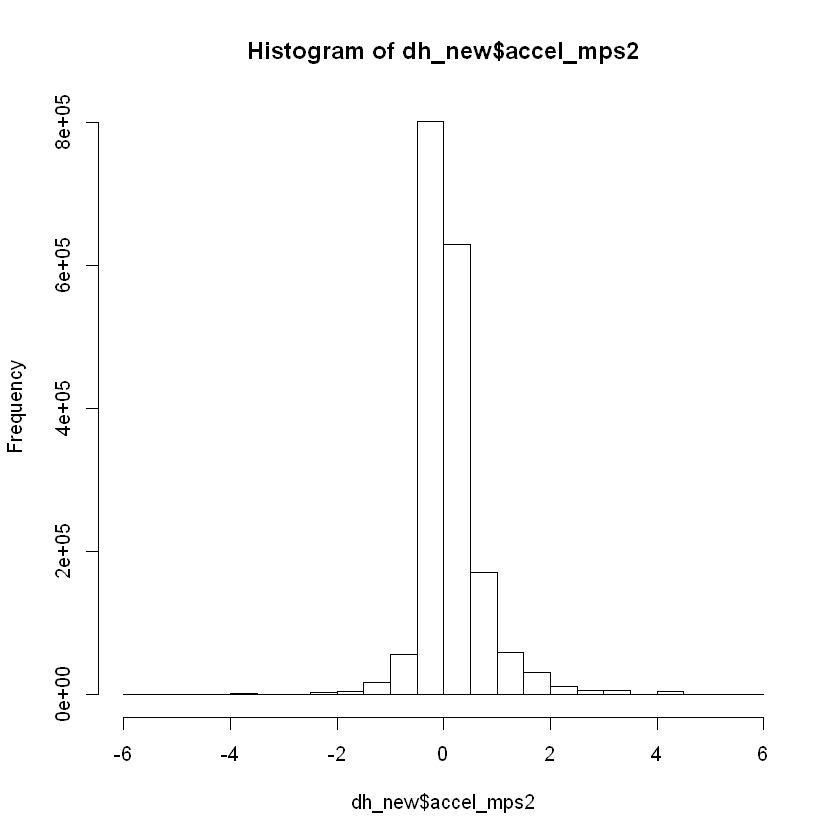

In [63]:
hist(dh_new$accel_mps2)

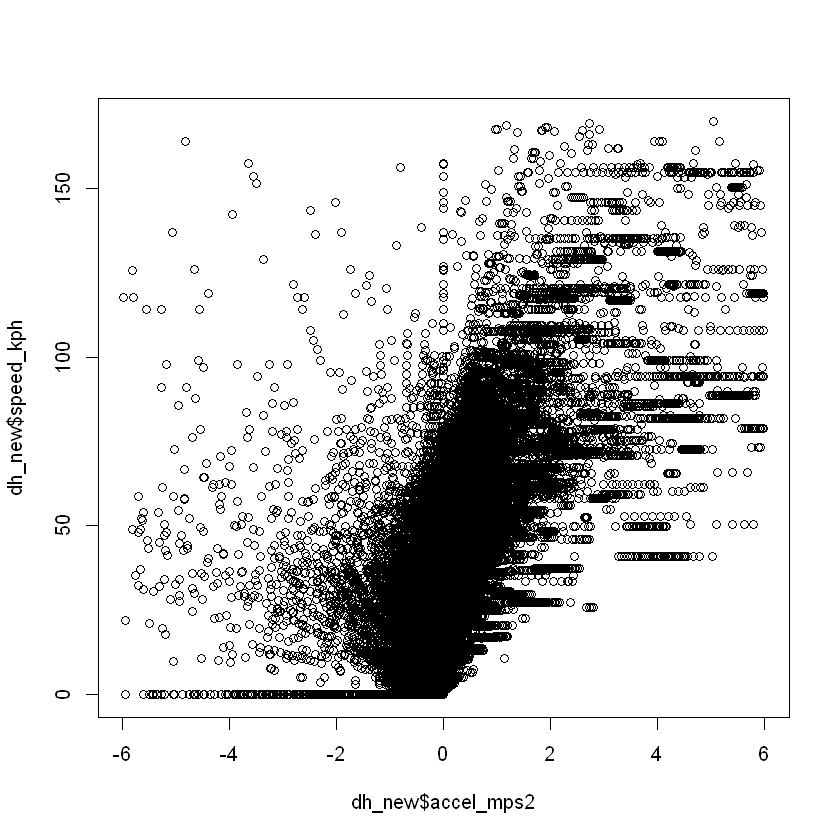

In [65]:
plot(x = dh_new$accel_mps2, y = dh_new$speed_kph)

In [2]:
dh_new = read.csv("../../data/raw/heavy-trajectory-19-04.csv")

In [11]:
max(dh_new$accel_mps2)

[1] 5.999421

In [12]:
max(dg_new$accel_mps2)

[1] 5.997794

In [14]:
head(dh_new)

,X,trxtime,lineid,trainid,counter,lat,lon,servicetypeid,heavyrailbranchid,tripid,...,year,time,trajid,interval_seconds,dist_meters,speed_mps,speed_kph,accel_mps2,cumdist_km,cumtime_hrs
,<int>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,...,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2019-04-18 00:01:04,1,1415341881,60,42.39232,-71.11897,1,0,2550365582,...,2019,2019-04-18 00:01:04,1,8,168.2425,21.030312,75.709124,1.43390828,0.4454548,0.01027778
2,2,2019-04-18 00:01:31,1,1415341881,81,42.39538,-71.11944,1,0,2550365582,...,2019,2019-04-18 00:01:31,1,27,342.6195,12.689613,45.682605,-0.30891480,0.7880744,0.01777778
3,3,2019-04-18 00:01:57,1,1415341881,108,42.39676,-71.12241,1,0,2550365582,...,2019,2019-04-18 00:01:57,1,26,288.2815,11.087752,39.915906,-0.06161003,1.0763559,0.02500000
4,4,2019-04-18 00:02:45,1,1415341881,153,42.39679,-71.12400,1,0,2550365582,...,2019,2019-04-18 00:02:45,1,48,130.7545,2.724052,9.806586,-0.17424375,1.2071104,0.03833333
5,5,2019-04-18 00:03:01,1,1415341881,176,42.39751,-71.12573,1,0,2550365582,...,2019,2019-04-18 00:03:01,1,16,162.8886,10.180537,36.649934,0.46603034,1.3699990,0.04277778
6,6,2019-04-18 00:03:12,1,1415341881,184,42.39762,-71.12732,1,0,2550365582,...,2019,2019-04-18 00:03:12,1,11,131.1293,11.920841,42.915029,0.15820948,1.5011282,0.04583333


In [48]:
dc = fread("../../data/raw/energy-consumption-08-19.csv") # Read in energy data
d_ridership = read.csv("../../data/raw/ridership-2019-2020-.csv")# Read in ridership data

In [15]:
dg_new$lineid = 4

## Bin speeds and aggregate table

In [2]:
interval_df = read.csv("../../data/tidy/trajectory-19-04-.csv")
dc = fread("../../data/raw/energy-consumption-08-19.csv") # Read in energy data
d_ridership = read.csv("../../data/raw/ridership-2019-2020-.csv")# Read in ridership data

In [3]:
# aggregrate_trajectory_table
line_computation = function(year, month){
    assign( fread(paste(DISTANCE_FILEPATH, paste( "trajectories", month, year, ".csv", sep = "-", collapse = ""), sep="")))
    assign("dh", fread(paste(DISTANCE_FILEPATH, paste("heavyrail", "trajectories", month, year, ".csv", sep = "-", collapse = ""), sep="")))
    # Combine the original tables to a single one for analysis
    dg = subset(dg, select = c(trxtime, trainid, lineid, lat, lon))
    dh = subset(dh, select = c(trxtime, trainid, lineid, lat, lon))
    df = rbind(dg, dh)
    return(df)
}

In [26]:
# aggregrate_trajectory_table
line_aggregation = function(dg,dh){
    dg = subset(dg, select = c(trxtime, trainid, lineid, lat, lon ,  speed_kph , accel_mps2 , interval_seconds , dist_meters))
    dh = subset(dh, select = c(trxtime, trainid, lineid, lat, lon ,  speed_kph , accel_mps2 , interval_seconds , dist_meters))
    df = rbind(dg, dh) 
    return(df)
}

In [27]:
d = line_aggregation(dg_new,dh_new)

In [44]:
head(d)

,trxtime,trainid,lineid,lat,lon,speed_kph,accel_mps2,interval_seconds,dist_meters
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2019-04-18 05:33:20,10001,4,42.33696,-71.25329,8.0063442,0.060549294,12,26.68781
2,2019-04-18 05:50:21,10001,4,42.33689,-71.25384,0.1637829,-0.002133682,1021,46.45064
3,2019-04-18 05:51:52,10001,4,42.33692,-71.25150,7.6248225,0.022774846,91,192.73857
4,2019-04-18 05:52:04,10001,4,42.33666,-71.25081,19.2882000,0.269985590,12,64.29400
5,2019-04-18 15:20:54,10002,4,42.34802,-71.08758,0.0000000,-2.486660835,4,0.00000
6,2019-04-18 15:21:42,10002,4,42.34788,-71.08627,8.1603389,0.047224184,48,108.80452


In [42]:
# Unit conversion
unit_transfer = function(df){
   df$hour = hour(df$trxtime)
   df$speed_mph = df$speed_kph*0.621371 #kph to mph
   df$distance_mile = df$dist_meters*0.000621371 #convert from meters to mile
   df$time_hr = df$interval_seconds/3600.0 #convert from seconds to hour
   df$month = month(df$trxtime)
   df$day = day(df$trxtime)
   df$year = year(df$trxtime) 
  return(df)
}    

In [43]:
interval_df = unit_transfer(d)

In [45]:
head(interval_df)

,trxtime,trainid,lineid,lat,lon,speed_kph,accel_mps2,interval_seconds,dist_meters,hour,speed_mph,distance_mile,time_hr,month,day,year
,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,2019-04-18 05:33:20,10001,4,42.33696,-71.25329,8.0063442,0.060549294,12,26.68781,5,4.9749101,0.01658303,0.003333333,4,18,2019
2,2019-04-18 05:50:21,10001,4,42.33689,-71.25384,0.1637829,-0.002133682,1021,46.45064,5,0.1017699,0.02886308,0.283611111,4,18,2019
3,2019-04-18 05:51:52,10001,4,42.33692,-71.25150,7.6248225,0.022774846,91,192.73857,5,4.7378436,0.11976216,0.025277778,4,18,2019
4,2019-04-18 05:52:04,10001,4,42.33666,-71.25081,19.2882000,0.269985590,12,64.29400,5,11.9851281,0.03995043,0.003333333,4,18,2019
5,2019-04-18 15:20:54,10002,4,42.34802,-71.08758,0.0000000,-2.486660835,4,0.00000,15,0.0000000,0.00000000,0.001111111,4,18,2019
6,2019-04-18 15:21:42,10002,4,42.34788,-71.08627,8.1603389,0.047224184,48,108.80452,15,5.0705980,0.06760797,0.013333333,4,18,2019


In [36]:
interval_df = bin_speeds(interval_df,8)

[1] "The speed bins are: 0"               
[2] "The speed bins are: 3.33272736335731"
[3] "The speed bins are: 8.50050835028565"
[4] "The speed bins are: 11.8052011776986"
[5] "The speed bins are: 16.7923674403438"
[6] "The speed bins are: 22.3705035018412"
[7] "The speed bins are: 24.7505772322724"
[8] "The speed bins are: 34.9638698112347"
[9] "The speed bins are: 105.519692067959"
[1] "Percentage error of summed speed bin times = 0%"


In [35]:
interval_df = bin_accelerations(interval_df,8)

[1] "The acceleration bins are: -5.99748799725593"  
[2] "The acceleration bins are: -0.570758748925381" 
[3] "The acceleration bins are: -0.18134232893492"  
[4] "The acceleration bins are: -0.0696380201589522"
[5] "The acceleration bins are: 0"                  
[6] "The acceleration bins are: 0.0941672379743939" 
[7] "The acceleration bins are: 0.419860505282267"  
[8] "The acceleration bins are: 0.999133538718633"  
[9] "The acceleration bins are: 5.99942097861047"   
[1] "Percentage error of summed acceleration bin times = 0%"


In [46]:
interval_df = bin_speeds(interval_df,8)
interval_df = bin_accelerations(interval_df,8)
interval_df = hour_aggregate(interval_df,8)

[1] "The speed bins are: 0"               
[2] "The speed bins are: 3.33272736335731"
[3] "The speed bins are: 8.50050835028565"
[4] "The speed bins are: 11.8052011776986"
[5] "The speed bins are: 16.7923674403438"
[6] "The speed bins are: 22.3705035018412"
[7] "The speed bins are: 24.7505772322724"
[8] "The speed bins are: 34.9638698112347"
[9] "The speed bins are: 105.519692067959"
[1] "Percentage error of summed speed bin times = 0%"
[1] "The acceleration bins are: -5.99748799725593"  
[2] "The acceleration bins are: -0.570758748925381" 
[3] "The acceleration bins are: -0.18134232893492"  
[4] "The acceleration bins are: -0.0696380201589522"
[5] "The acceleration bins are: 0"                  
[6] "The acceleration bins are: 0.0941672379743939" 
[7] "The acceleration bins are: 0.419860505282267"  
[8] "The acceleration bins are: 0.999133538718633"  
[9] "The acceleration bins are: 5.99942097861047"   
[1] "Percentage error of summed acceleration bin times = 0%"


In [47]:
head(interval_df)

month,hour,day,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,...,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,5,18,464.394,40.10694,14.18222,7.716111,3.554167,3.673889,3.040000,...,1.466111,5.959444,6.580833,13.33333,6.038889,3.873611,1.718889,1.135833,20.20326,11.578892
4,15,18,1324.980,208.83472,123.80944,35.813889,10.250556,11.181667,7.685556,...,3.900556,14.942778,23.580000,105.82639,42.088889,10.448611,5.031111,3.016389,19.42858,6.344634
4,16,18,1409.778,192.03167,103.41972,35.088611,12.527500,11.157778,8.751944,...,4.168611,15.835278,25.506389,79.69250,47.324444,11.042222,5.416389,3.045833,19.24910,7.341382
4,17,18,1463.739,205.85472,109.37500,43.069167,11.019167,11.886111,8.746944,...,4.457222,15.849722,27.717222,81.83583,56.040000,10.901389,5.480833,3.572500,19.37381,7.110545
4,18,18,1409.276,178.46694,88.44000,35.390556,12.376111,12.353611,8.975556,...,4.400833,14.901667,27.059444,80.63833,32.303056,10.845000,5.151111,3.167500,19.14736,7.896565
4,19,18,1272.166,155.38139,72.36694,35.792222,9.624444,10.995000,8.405833,...,4.304722,13.193333,23.107778,48.52639,49.091389,9.690278,4.417222,3.050278,19.13814,8.187376


In [31]:
# Calculate the speed bins 
bin_speeds <- function (dataframe, num_bins) {
  dataframe = data.table(dataframe)
  dummy_cols = c(paste0("speed_bin_",1:num_bins,"_dummy"))
  bin_time_cols = c(paste0("speed_bin_",1:num_bins,"_time_hr"))
  cutpoints <- quantile(dataframe$speed_mph,seq(0, 1, 1/num_bins),na.rm=TRUE) 
  print(paste0("The speed bins are: ", cutpoints))
  for(n in seq(1, num_bins)) {
    if(n == 1){
     dataframe[, dummy_cols[n] := sapply(speed_mph,  function(x) ifelse (x < cutpoints[n+1], 1, 0))]
    }
    else if (n == num_bins){
     dataframe[, dummy_cols[n] := sapply(speed_mph,  function(x) ifelse (x >= cutpoints[num_bins], 1, 0))]
    }
    else {
    dataframe[, dummy_cols[n] := sapply(speed_mph,  function(x) ifelse (x >= cutpoints[n] & x < cutpoints[n + 1], 1, 0))]
    }
  }
 dataframe[, (bin_time_cols) := lapply(.SD, function(x) x * dataframe$time_hr ), .SDcols = dummy_cols]
 print(paste0("Percentage error of summed speed bin times = ", 
              round(100*(sum(colSums(dataframe %>% select(starts_with("speed_bin_") & ends_with("_time_hr")),na.rm=TRUE)) 
                         - sum(dataframe$time_hr, na.rm=TRUE))/sum(dataframe$time_hr, na.rm=TRUE),2), "%"))
 return(dataframe) 
}

In [32]:
# Calculate the acceleration bins 
bin_accelerations <- function (dataframe, num_bins) {
  dataframe = data.table(dataframe)
  dummy_cols = c(paste0("accel_bin_",1:num_bins,"_dummy"))
  bin_time_cols = c(paste0("accel_bin_",1:num_bins,"_time_hr"))
  cutpoints <- quantile(dataframe$accel_mps2,seq(0, 1, 1/num_bins),na.rm=TRUE) 
  print(paste0("The acceleration bins are: ", cutpoints))
  for(n in seq(1, num_bins)) {
    if(n == 1){
      dataframe[, dummy_cols[n] := sapply(accel_mps2,  function(x) ifelse (x < cutpoints[n+1], 1, 0))]
    }
    else if (n == num_bins){
      dataframe[, dummy_cols[n] := sapply(accel_mps2,  function(x) ifelse (x >= cutpoints[num_bins], 1, 0))]
    }
    else {
      dataframe[, dummy_cols[n] := sapply(accel_mps2,  function(x) ifelse (x >= cutpoints[n] & x < cutpoints[n + 1], 1, 0))]
    }
  }
  dataframe[, (bin_time_cols) := lapply(.SD, function(x) x * dataframe$time_hr ), .SDcols = dummy_cols]
  print(paste0("Percentage error of summed acceleration bin times = ", 
               round(100*(sum(colSums(dataframe %>% select(starts_with("accel_bin_") & ends_with("_time_hr")),na.rm=TRUE)) 
                          - sum(dataframe$time_hr, na.rm=TRUE))/sum(dataframe$time_hr, na.rm=TRUE),2), "%"))                                                  
  return(dataframe)
}

In [38]:
# Aggregate dataframe at hour level
hour_aggregate <- function (dataframe,num_bins) {
    dataframe = data.table(dataframe)
    dataframe$month = as.character(dataframe$month)
    dataframe$hour = as.character(dataframe$hour)
    dataframe$day = as.character(dataframe$day)
    sum_cols = c("distance_mile","time_hr",paste0("speed_bin_",1:num_bins,"_time_hr"),paste0("accel_bin_",1:num_bins,"_time_hr"))
    agg_df = dataframe[, lapply( .SD, sum , na.rm=TRUE), by = c("month",'hour',"day"), .SDcols = sum_cols]
    avg_interval_speed_mph_df = dataframe[, lapply( .SD, mean , na.rm=TRUE), by = c("month","hour","day"), .SDcols = 'speed_mph']
    agg_df[, 'avg_interval_speed_mph'] = avg_interval_speed_mph_df$speed_mph
    agg_df[, 'avg_hour_speed_mph'] = agg_df$distance_mile/agg_df$time_hr
    return(agg_df)
}

In [39]:
interval_df = hour_aggregate(interval_df,8)

In [53]:
head(interval_df)

month,hour,day,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,...,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,5,18,464.394,40.10694,14.18222,7.716111,3.554167,3.673889,3.040000,...,1.466111,5.959444,6.580833,13.33333,6.038889,3.873611,1.718889,1.135833,20.20326,11.578892
4,15,18,1324.980,208.83472,123.80944,35.813889,10.250556,11.181667,7.685556,...,3.900556,14.942778,23.580000,105.82639,42.088889,10.448611,5.031111,3.016389,19.42858,6.344634
4,16,18,1409.778,192.03167,103.41972,35.088611,12.527500,11.157778,8.751944,...,4.168611,15.835278,25.506389,79.69250,47.324444,11.042222,5.416389,3.045833,19.24910,7.341382
4,17,18,1463.739,205.85472,109.37500,43.069167,11.019167,11.886111,8.746944,...,4.457222,15.849722,27.717222,81.83583,56.040000,10.901389,5.480833,3.572500,19.37381,7.110545
4,18,18,1409.276,178.46694,88.44000,35.390556,12.376111,12.353611,8.975556,...,4.400833,14.901667,27.059444,80.63833,32.303056,10.845000,5.151111,3.167500,19.14736,7.896565
4,19,18,1272.166,155.38139,72.36694,35.792222,9.624444,10.995000,8.405833,...,4.304722,13.193333,23.107778,48.52639,49.091389,9.690278,4.417222,3.050278,19.13814,8.187376


In [56]:
interval_df[day == "1" & hour == "1",]

month,hour,day,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,...,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,1,1,194.7358,20.60556,11.32861,1.33,0.995,2.345833,1.237778,...,2.313611,1.130833,1.351944,8.838611,4.796667,0.7630556,0.3669444,1.043889,21.21943,9.450645


In [40]:
head(interval_df)

month,hour,day,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,...,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,5,NA,10397.09,896.8792,305.3022,176.4561,82.24417,90.75889,66.25583,...,32.94972,133.3333,150.8153,292.4792,134.1947,88.87833,39.24056,24.98806,19.63698,11.592522
NA,15,NA,33624.06,4514.4181,2418.0486,844.6758,270.14194,264.22917,206.74889,...,101.88139,379.7886,607.6347,2046.9892,910.7672,266.02306,124.81361,76.52028,19.24704,7.448149
NA,16,NA,35599.57,5006.9969,2805.2831,875.0969,291.32278,276.74417,219.84750,...,108.95667,403.7014,649.6892,2321.1414,1026.7822,280.25361,134.02750,82.44500,19.16755,7.109965
NA,17,NA,36376.52,5069.9019,2722.6761,1002.1669,305.20778,281.92194,221.45556,...,111.03500,395.6247,679.6061,2242.4611,1142.2908,279.44500,135.19944,84.23972,19.01370,7.174994
NA,18,NA,36652.30,5092.8758,2723.0844,999.9642,309.17972,299.67722,229.61056,...,115.39611,407.0586,665.3325,2278.4803,1125.8108,280.43389,134.77750,85.58611,18.85407,7.196779
NA,19,NA,33445.33,4366.5275,2212.6256,896.3050,273.00194,283.31000,219.19000,...,111.24667,377.7564,589.6261,1815.9147,1009.0711,258.82028,122.82500,81.26722,18.59615,7.659480


In [50]:
# Combine ridership data
merge_ridership = function(merged_dt,d_ridership){
   d_ridership$route_or_line = as.character(d_ridership$route_or_line)
   d_ridership$route_or_line[which(d_ridership$route_or_line == "Green Line")] = "4"
   d_ridership$route_or_line[which(d_ridership$route_or_line == "Red Line")] = "1"
   d_ridership$route_or_line[which(d_ridership$route_or_line == "Blue Line")] = "2"
   d_ridership$route_or_line[which(d_ridership$route_or_line == "Orange Line")] = "3"
   d_ridership$year = as.character(year(d_ridership$servicedate)）
   d_ridership$month = as.character(month(d_ridership$servicedate)）
   d_ridership$day = as.character(day(d_ridership$servicedate)）
   d_ridership$hour = as.character(hour(d_ridership$halfhour)）
   d_ridership = aggregate(d_ridership$rawtaps_split, list(year = d_ridership$year, month = d_ridership$month, day = d_ridership$day, hour = d_ridership$hour), FUN = sum)
   names(d_ridership)[names(d_ridership) == 'x'] <- 'ridership'
   #d_ridership$lineid = as.integer(d_ridership$lineid) 
   d_ridership = subset(d_ridership,year == "2019" & month == "4")
   merged_db = merge(merged_dt,d_ridership,by = c("month","day","hour"),all=T) 
   return(merged_db)
}

In [51]:
df_combin = merge_ridership(interval_df,d_ridership)

In [52]:
head(df_combin)

month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,speed_bin_5_time_hr,...,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,year,ridership
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
4,1,0,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,2019,1561.0
4,1,1,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,2019,171.7
4,1,10,1205.696,136.5372,56.91806,32.69000,11.180833,11.652222,7.215278,...,19.47833,50.94083,34.16528,8.908333,4.239444,2.603611,18.13921,8.830532,2019,19134.9
4,1,11,1056.887,130.5997,58.60944,31.41056,9.850833,10.297778,6.296944,...,17.31139,52.40889,31.95000,8.171111,3.671944,2.242222,17.19956,8.092567,2019,17253.1
4,1,12,1039.803,135.3053,64.39000,32.45500,9.398611,8.571944,6.236944,...,16.61778,54.30944,35.87639,7.689167,3.790000,2.301944,17.92389,7.684868,2019,17870.3
4,1,13,964.337,124.2056,62.16806,25.62361,8.023056,8.515278,5.906111,...,16.15472,45.98694,33.95056,7.851111,3.487500,2.195278,17.93028,7.764041,2019,18464.4


In [57]:
# Combine energy consumption data
merge_energy <- function (energy_df,hour_dt) {
    energy_df = subset(energy_df,energy_df$Year == 2019 & energy_df$Month == 4)
    # Melt by hour 
    melted_energy_df = melt(energy_df, id.vars=c('Year','Month','Day of Month','WJ','TAVG'), measure.vars = paste0("Hour ",1:24))
        colnames(melted_energy_df) = c('year', 'month', 'day', 'weekends_weekday', 'TAVG', 'Hour', 'energy_kwh')
    hour_energy_dt <- setDT(melted_energy_df)
    hour_energy_dt[, Hour := str_replace(Hour, "Hour ", "")]
    hour_energy_dt$Hour = as.numeric(hour_energy_dt$Hour)
    hour_energy_dt$Hour = hour_energy_dt$Hour - 1
    colnames(hour_energy_dt)[6] <- 'hour'
    hour_energy_dt$year = as.character(hour_energy_dt$year)
    hour_energy_dt$month = as.character(hour_energy_dt$month)
    hour_energy_dt$day = as.character(hour_energy_dt$day)
    hour_energy_dt$hour = as.character(hour_energy_dt$hour)
    merged_dt = merge(hour_dt,hour_energy_dt,by = c("year","month","day","hour") , all = T)
    return(merged_dt)
}

In [58]:
df_main = merge_energy(dc,df_combin)

In [59]:
head(df_main)

year,month,day,hour,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,speed_bin_3_time_hr,speed_bin_4_time_hr,...,accel_bin_5_time_hr,accel_bin_6_time_hr,accel_bin_7_time_hr,accel_bin_8_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,ridership,weekends_weekday,TAVG,energy_kwh
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
NA,5,1,0,620.5840,47.139722,10.987500,10.591111111,5.5061111,5.5463889,...,8.772222,4.739722222,2.33777778,1.9297222,19.01108,13.164778,NA,NA,NA,NA
NA,5,1,1,194.7358,20.605556,11.328611,1.330000000,0.9950000,2.3458333,...,4.796667,0.763055556,0.36694444,1.0438889,21.21943,9.450645,NA,NA,NA,NA
NA,5,1,2,56.1403,5.409444,2.803333,0.004444444,0.5230556,0.6455556,...,2.927500,0.001666667,0.03416667,0.5561111,16.42396,10.378200,NA,NA,NA,NA
2019,4,1,0,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1561.0,2,42,40.567
2019,4,1,1,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,171.7,2,42,35.110
2019,4,1,10,1205.6963,136.537222,56.918056,32.690000000,11.1808333,11.6522222,...,34.165278,8.908333333,4.23944444,2.6036111,18.13921,8.830532,19134.9,2,42,53.894


In [60]:
write.csv(df_main,"../../data/tidy/system-model-19-04.csv")

## Computing the final table

In [59]:
main <- function (interval_df,num_bins,energy_df,d_ridership,yy,mm) {
    final_df <- interval_df %>% unit_transfer（) %>% bin_speeds(num_bins) %>% 
    bin_accelerations(num_bins) %>% merge_ridership(d_ridership,yy,mm) %>% merge_energy(energy_df,yy,mm)
    return(final_df)
}

In [ ]:
df_final = main(interval_df,5,energy_df,d_ridership)
#write.csv(df_final,"../Data/tidy/system-model.csv")

In [106]:
head(dm)

,year,month,day,hour,lineid,ridership,distance_mile,time_hr,speed_bin_1_time_hr,speed_bin_2_time_hr,...,accel_bin_1_time_hr,accel_bin_2_time_hr,accel_bin_3_time_hr,accel_bin_4_time_hr,accel_bin_5_time_hr,avg_interval_speed_mph,avg_hour_speed_mph,weekends_weekday,TAVG,energy_kwh
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2019,4,1,0,4,448.77,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,2,42,40.567
2,2019,4,1,0,1,477.41,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,2,42,40.567
3,2019,4,1,0,2,184.70,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,2,42,40.567
4,2019,4,1,0,3,450.12,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,2,42,40.567
5,2019,4,1,1,2,21.40,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,2,42,35.110
6,2019,4,1,1,3,61.35,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,2,42,35.110
